![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

## Yakuniy amaliyot. `matplotlib`


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

XYZ kompaniyasi taxminan 4000 ishchi xodim ishlaydi va afsuski har yili xodimlarning 15% ga yaqini o'z xohishlari bilan yoki kompaniya tomonidan ishdan bo'shatiladi va yana yangi xodim ishga olinadi. Bu esa kompaniya uchun bir qancha noqulayliklar tug'diradi (loyihalar sekinlashishi, ishga qabul qilish jarayoni uzoqligi, yangi ishchi ko'nikishi uchun treninglar va ma'lum vaqt kerakligi). Ishchilarni saqlab qolish uchun kompaniya HR tahlil qilib ko'rishga qaror qildi va quyidagi datasetdan foydalanib, qanday faktorlar ishchilarni bo'shashiga sabab bo'lishini tahlil qilishgan.
Dataset ustun nomlari:

1.   Age - yoshi
2.   Attrition - ishdan bo'shaganmi
3.   BusinessTravel - komandirovka
4.   DistanceFromHome - uydan ishgacha bo'lgan masofa (km)
5.   Education - Ta'lim
6.   Gender - jinsi
7.   MaritalStatus - oilaviy holati


<a href="https://ibb.co/sR5zPJV"><img src="https://i.ibb.co/g9vh7FR/hr.png" alt="hr" border="0" style="width:100%"></a>


In [2]:
#@title QUYIDAGI KODGA TEGMANG!!! 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 1-VAZIFA: Quyidagi CSV fayl linkidan foydalaning 
### - va ma'lumotlarni "data" nomli o'zgaruvchiga biriktiring 
### - hamda 'EmployeeCount','EmployeeID','StandardHours' ustunlari ortiqchaligi sababli o'chirib tashlang

### LINK: https://raw.githubusercontent.com/mukhammad-irmatov/health_dataset/main/hr_dataset.csv

In [56]:
df=pd.read_csv('https://raw.githubusercontent.com/mukhammad-irmatov/health_dataset/main/hr_dataset.csv')
df.drop(['EmployeeCount','EmployeeID','StandardHours'], axis=1, inplace=True)

## 2-VAZIFA: Qaysi ustunlarda nechtadan null qiymatlar borligini aniqlang
### - o'sha ustunlardagi kataklarni 0 qiymati bilan to'ldiring.


In [22]:
print(df.isnull().sum())
df.fillna(value=0, inplace=True)

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


## 3-VAZIFA: Barcha ustunlardagi o'zaro korrelatsiyasini aniqlang
### - hamda heatmap orqali 16:10 o'lchamda ekranga chiqaring 


                              Age  DistanceFromHome  Education  JobLevel  \
Age                      1.000000          0.006963  -0.035706 -0.002884   
DistanceFromHome         0.006963          1.000000  -0.008638 -0.037329   
Education               -0.035706         -0.008638   1.000000  0.045746   
JobLevel                -0.002884         -0.037329   0.045746  1.000000   
MonthlyIncome           -0.044314         -0.021607   0.006410  0.047316   
NumCompaniesWorked       0.299297         -0.012617  -0.016096 -0.010877   
PercentSalaryHike       -0.033137          0.038125  -0.040531  0.010973   
StockOptionLevel        -0.031753          0.011169   0.001261  0.000993   
TotalWorkingYears        0.678436          0.008925  -0.011581 -0.035498   
TrainingTimesLastYear   -0.027308         -0.009001   0.010472 -0.032500   
YearsAtCompany           0.311309          0.031684   0.006080 -0.064219   
YearsSinceLastPromotion  0.216513          0.002290   0.022490 -0.060811   
YearsWithCur

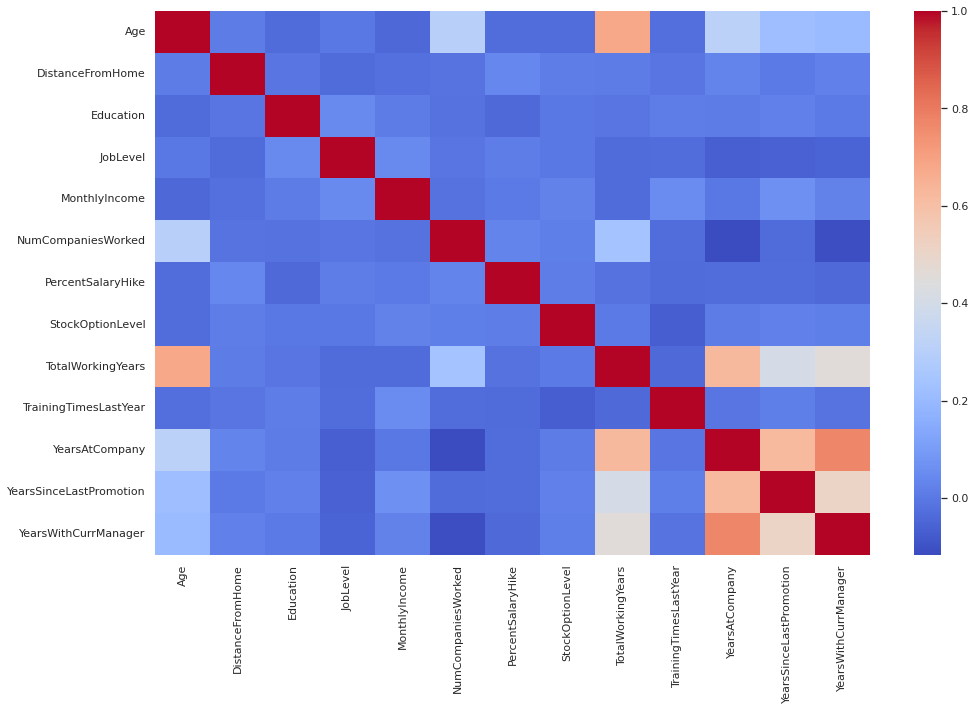

In [28]:
# JAVOBNI SHUYERGA YOZING
print(df.corr())
plt.figure(figsize=(16,10))
sns.heatmap(data=df.corr(), cmap="coolwarm")
plt.show()

## 4-VAZIFA: Dataset uzunligini toping, ya'ni umumiy nechta qator(row) dan tashkil topgan
#### - Attrition(ishdan bo'shaganmi) ustunidagi "Yes" deb javob berilgan qatorlar soni
#### - Attrition(ishdan bo'shaganmi) ustunidagi "No" deb javob berilgan qatorlar soni
#### - Attrition(ishdan bo'shaganmi) ustunidagi "Yes" deb javob berilgan qatorlar soni umumiy datasetning necha fozini tashkil etadi
#### - Attrition(ishdan bo'shaganmi) ustunidagi "No" deb javob berilgan qatorlar soni umumiy datasetning necha fozini tashkil etadi

**Hint:** har birini ekranga chiqarish uchun print dan foydalaning


<a href="https://imgbb.com/"><img src="https://i.ibb.co/28VjRyB/img.png" alt="img" border="0"></a>

In [37]:
print(df.shape[0])
print(df[df.Attrition=='Yes'].shape[0])
print(df[df.Attrition=='No'].shape[0])
print(f"Yes: {df[df['Attrition']=='Yes'].shape[0]/len(df)*100} % ni tashkil etadi")
print(f"No: {df[df['Attrition']=='No'].shape[0]/len(df)*100} % ni tashkil etadi")

4410
711
3699
Yes: 16.122448979591837 % ni tashkil etadi
No: 83.87755102040816 % ni tashkil etadi


## 5-VAZIFA: Countplot() orqali Attrition ustunidagi ma'lumotlarni "Yes" "No" soniga ko'ra, ustunli grafik shaklida tasvirlang

<a href="https://imgbb.com/"><img src="https://i.ibb.co/Px9Bn6J/plt.png" alt="plt" border="0"></a>

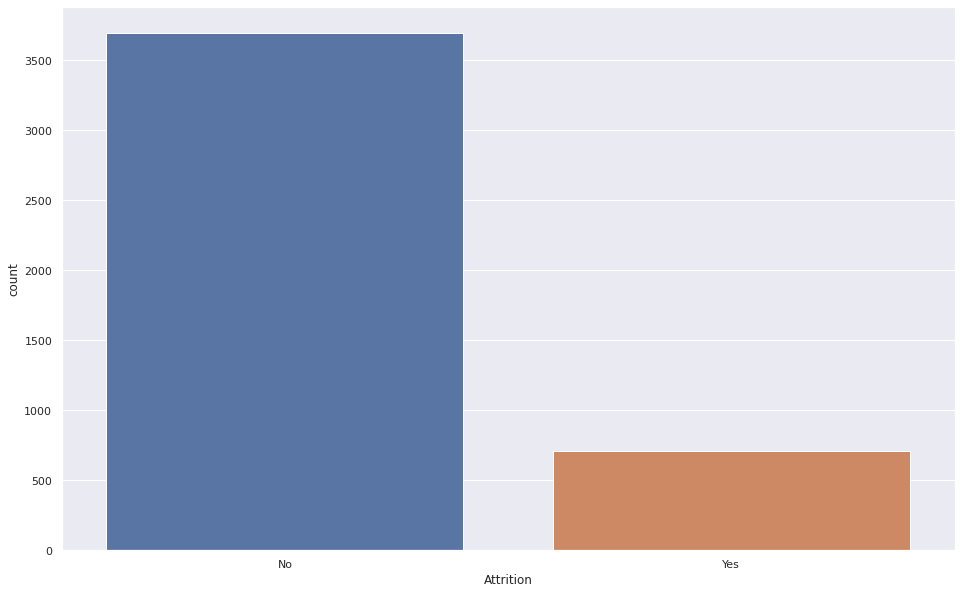

In [41]:
plt.figure(figsize=(16,10))
sns.countplot(data=df, x=df['Attrition'])
plt.show()

## 6-VAZIFA: Countplot() orqali Attrition ustunidagi ma'lumotlarni "Yes" "No" soniga ko'ra hamda gender ustuniga bo'lingan holda ustunli grafikda tasvirlang.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/R7BC8z2/bygender.png" alt="bygender" border="0"></a>

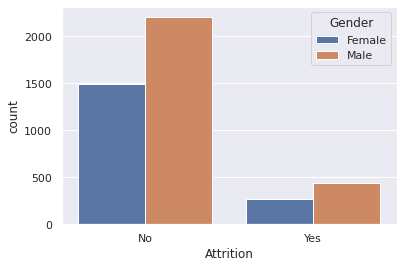

In [42]:
sns.countplot(data=df,x=df['Attrition'], hue=df['Gender'])
plt.show()

## 7-VAZIFA: Countplot() orqali Attrition ustunidagi ma'lumotlarni "Yes" "No" soniga ko'ra hamda jobLevel ustuniga bo'lingan holda ustunli grafikda tasvirlang.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/kmzVfDK/byjoblevel.png" alt="byjoblevel" border="0"></a><br /><a target='_blank' href='https://the-crosswordsolver.com/tobagos-island-neighbor-8-letters'></a><br />

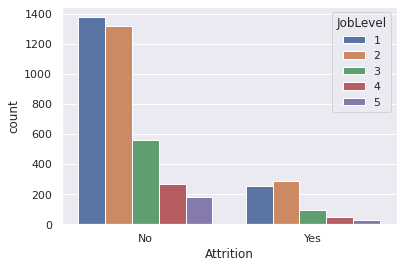

In [43]:
# JAVOBNI SHUYERGA YOZING
sns.countplot(data=df, x=df['Attrition'], hue=df['JobLevel'])
plt.show()

## 8-VAZIFA: Pie chart orqali "Attrition" (ishdan bo'shaganmi) ustunidagi Yes va No qiymatlariga ko'ra grafikni chiqaring

<a href="https://imgbb.com/"><img src="https://i.ibb.co/LZ4cCKb/PieChart.png" alt="PieChart" border="0"></a><br /><a target='_blank' href='https://the-crosswordsolver.com/netman-smith-4-letters'></a><br />

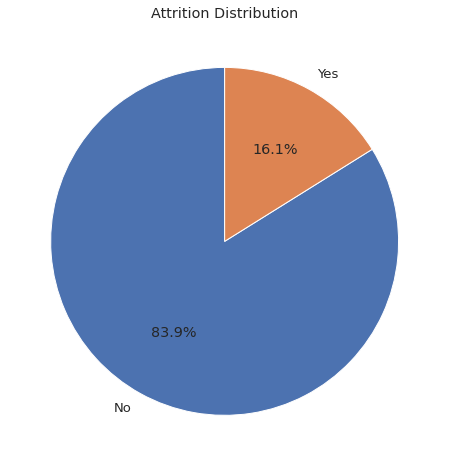

In [69]:
count_yn=df['Attrition'].value_counts()
plt.figure(figsize=(10,8))
sns.set_palette('pastel')
sns.set(font_scale=1.2)
plt.title('Attrition Distribution')
plt.pie(x=count_yn, labels=count_yn.index, autopct='%1.1f%%', startangle=90)
plt.show()

## 9-VAZIFA:  Crosstab orqali "Attrition" (ishdan bo'shaganmi) ustunidagi Yes va No qiymatlari hamda Department ustuniga ko'ra grafikni chiqaring

<a href="https://imgbb.com/"><img src="https://i.ibb.co/g4KgG6q/depart.png" alt="depart" border="0"></a>

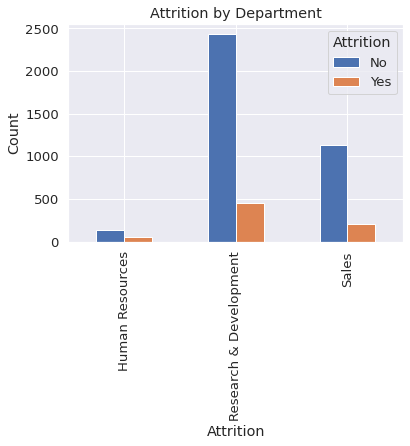

In [92]:
# Create crosstab
ct = pd.crosstab(df["Department"],df["Attrition"])

# Plot crosstab as stacked bar chart
ct.plot(kind="bar")

# Add labels and title
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Attrition by Department")

# Show plot
plt.show()

## 10-VAZIFA:  Seaborn kutubxonasining Distribution(taqsimot) imkoniyatidan foydalanib, Attrition(ishdan bo'shaganmi) ustunini MonthlyIncome ustuniga solishtirilganligini grafigini ekranga chiqaring.


**Hint: ** Bu orqali biz ishchining oylik maoshini uning ishdan bo'shab ketishiga bog'liq yoki bog'liq emasligini topamiz.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/zQc4FVZ/displot.png" alt="displot" border="0"></a><br /><a target='_blank' href='https://500pxdownload.com/'></a><br />

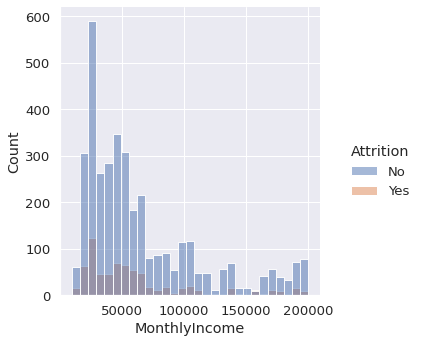

In [94]:
sns.displot(data=df, x=df['MonthlyIncome'], hue=df['Attrition'])
plt.show()